[*********************100%***********************]  1 of 1 completed


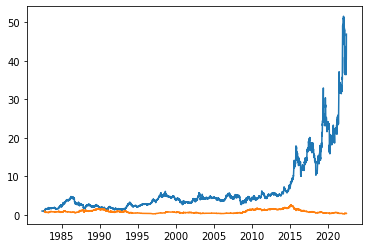

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ma = 21

ftse = yf.download(tickers='COKE', period='40y')
ftse = ftse.drop('Open', axis = 1)
ftse = ftse.drop('Low', axis = 1)
ftse = ftse.drop('High', axis = 1)
ftse = ftse.drop('Volume', axis = 1)
ftse = ftse.drop('Adj Close', axis = 1)

ftse['returns'] = np.log(ftse['Close']).diff()
ftse['ma'] = ftse['Close'].rolling(ma).mean()
ftse['ratio'] = ftse['Close'] / ftse['ma']

percentiles = [5, 10, 50, 90, 95]
p = np.percentile(ftse['ratio'].dropna(), percentiles)

# ftse['ratio'].dropna().plot(legend = True)
# plt.axhline(p[0], c = (.5, .5, .5), ls='--')
# plt.axhline(p[2], c = (.5, .5, .5), ls='--')
# plt.axhline(p[-1], c = (.5, .5, .5), ls='--')

short = p[-1]
long = p[0]
ftse['position'] = np.where(ftse.ratio > short, -1, np.nan)
ftse['position'] = np.where(ftse.ratio < long, 1, ftse['position'])
ftse['position'] = ftse['position'].ffill()

#ftse.plot()


ftse['strat_return'] = ftse['returns'] * ftse['position'].shift()

plt.plot(np.exp(ftse['returns'].dropna()).cumprod(), label = 'buy/hold')
plt.plot(np.exp(ftse['strat_return'].dropna()).cumprod(), label = 'strategy')
#ftse.position.dropna().plot()